<a href="https://colab.research.google.com/github/teekaraman/Knowledge_based_material_selection/blob/main/Flywheel_material_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dash
!pip install dash-renderer
!pip install dash_html_components
!pip install dash_core_components
!pip install inquirer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-py3-none-any.whl size=1014851 sha256=27d6c52e29b521ca6a3cf3dc2ea767d12f2f4e0c5dd6581d076992644f4775b3
  Stored in directory: /root/.cache/pip/wheels/bd/b7/17/d60d18a7b3420135dfe0ce04d361b396f32b66b75a40471bb6
Successfully built dash-renderer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 1.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import math
from dash import Dash,html,dcc,Input,Output
from IPython.display import Image
import inquirer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Anish/All_materials_data.xlsx')

In [ ]:
df

,Class,Sub-class,Material,Alloys,Density (Mg/m3),Youngs Modulus(GPa),Yield Stress (MPa),Ultimate Tensile Stress (MPa),Poisson's ratio,cost(/Kg/m3),CO2 - equivalent (Kg/Kg),Shear modulus(Gpa),Fatigue strength at 10^7 cycle(Mpa),Vickers-hardness
0,Metal,Ferrous,High alloy steel,"AerMet 100, High alloy steel (ST & A)",7.93,203,1790,2130,0.312,3780.0,9.21 - 10.2,73 - 76.7,772 - 900,568 - 594
1,Metal,Ferrous,High alloy steel,"AF1410, High alloy steel (ST & O)",7.87,213,1640,1790,0.312,2960.0,9.24 - 10.2,77 - 80.9,650 - 750,500 - 600
2,Metal,Ferrous,High alloy steel,"A-286, High alloy steel, Fe based superalloy(S...",7.98,211,793,1100,0.323,922.0,9.18 - 10.1,77 - 80.9,407 - 475,287 - 330
3,Metal,Ferrous,High alloy steel,"N-155, High alloy steel, Fe based superalloy (ST)",8.35,211,400,900,0.31,5270.0,15.6 - 17.2,77 - 80.9,262 - 326,190 - 220
4,Metal,Ferrous,High alloy steel,"250, High alloy steel (marged at 482 degree)",7.96,192,1810,1870,0.323,3880.0,8.26 - 9.1,70 - 77,642 - 816,445 - 480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hybrids,Foams,"polymer foams, rigid","Polyethylene foam, polymer foam, rigid",0.101 - 0.115,0.0519 - 0.0712,0.52 - 0.693,2.43 - 3.34,0.3 - 0.333,927.0,5.67 - 6.25,0.02 - 0.028,0.6 - 0.665,0.075 - 0.086
996,Hybrids,Foams,"polymer foams, rigid","Polymetharcylimide foam, polymer foam, rigid",0.052 - 0.055,0.07 - 0.075,0.4 - 0.8,1.55 - 1.65,0.29 - 0.31,10200.0,26.4 - 29.1,0.019 - 0.024,0.32 - 0.64,0.04 - 0.08
997,Hybrids,Foams,"polymer foams, rigid","Polyurethane foam, polymer foams, rigid",0.0592 - 0.64,0.00985 - 0.0195,0.192 - 0.314,0.524 - 0.693,0.3 - 0.333,903.0,4.86 - 5.35,0.00366 - 0.00503,0.32 - 0.65,0.04 - 0.09
998,Hybrids,Foams,"polymer foams, rigid","Polyvinylchloride cross linked foam, polymer f...",0.036 - 0.044,0.023 - 0.029,0.37 - 0.43,0.53 - 0.55,0.29 - 0.31,1390.0,5.23 - 5.77,0.01 - 0.016,0.296 - 0.344,0.037 - 0.043


In [ ]:
def density_lower(i):
  if type(i)==str:
    if '-' in i:
      return list(map(float,i.split('-')))[0]
    else:
      return list(map(float,i.split()))[0]
  else:
    return [round(i-0.05,2),round(i+0.05,2)][0]
def density_upper(i):
  if type(i)==str:
    if '-' in i:
      return list(map(float,i.split('-')))[1]
    else:
      return list(map(float,i.split()))[1]
  else:
    return [round(i-0.05,2),round(i+0.05,2)][1]
def ultimate_yield_lower(i):
  if type(i)==str:
    if '-' in i:
      return list(map(float,i.split('-')))[0]
    else:
      return list(map(float,i.split()))[0]
  else:
    return [round(i-0.05,2),round(i+0.05,2)][0]
def ultimate_yield_upper(i):
  if type(i)==str:
    if '-' in i:
      return list(map(float,i.split('-')))[1]
    else:
      return list(map(float,i.split()))[1]
  else:
    return [round(i-0.05,2),round(i+0.05,2)][1]
def fatigue_strength_upper(i):
  if type(i)==str:
    if '-' in i:
      return list(map(float,i.split('-')))[1]
    else:
      return list(map(float,i.split()))[1]
def fatigue_strength_lower(i):
  if type(i)==str:
    if '-' in i:
      return list(map(float,i.split('-')))[0]
    else:
      return list(map(float,i.split()))[0]
def avg(x):
  l=list(map(float,x.split("-")))
  return sum(l)/2

In [ ]:
df.loc[::,'Density_lower']=df['Density (Mg/m3)'].apply(density_lower)
df.loc[::,'Density_upper']=df['Density (Mg/m3)'].apply(density_upper)
df.loc[::,'Ultimate_lower']=df['Ultimate Tensile Stress (MPa)'].apply(ultimate_yield_lower)
df.loc[::,'Ultimate_upper']=df['Ultimate Tensile Stress (MPa)'].apply(ultimate_yield_upper)
df.loc[::,'Yield_lower']=df['Yield Stress (MPa)'].apply(ultimate_yield_lower)
df.loc[::,'Yield_upper']=df['Yield Stress (MPa)'].apply(ultimate_yield_upper)
df.loc[::,'Fatigue_lower']=df['Fatigue strength at 10^7 cycle(Mpa)'].apply(fatigue_strength_lower)
df.loc[::,'Fatigue_upper']=df['Fatigue strength at 10^7 cycle(Mpa)'].apply(fatigue_strength_upper)

In [ ]:
df

,Class,Sub-class,Material,Alloys,Density (Mg/m3),Youngs Modulus(GPa),Yield Stress (MPa),Ultimate Tensile Stress (MPa),Poisson's ratio,cost(/Kg/m3),...,Fatigue strength at 10^7 cycle(Mpa),Vickers-hardness,Density_lower,Density_upper,Ultimate_lower,Ultimate_upper,Yield_lower,Yield_upper,Fatigue_lower,Fatigue_upper
0,Metal,Ferrous,High alloy steel,"AerMet 100, High alloy steel (ST & A)",7.93,203,1790,2130,0.312,3780.0,...,772 - 900,568 - 594,7.8800,7.9800,2129.950,2130.050,1789.950,1790.050,772.000,900.000
1,Metal,Ferrous,High alloy steel,"AF1410, High alloy steel (ST & O)",7.87,213,1640,1790,0.312,2960.0,...,650 - 750,500 - 600,7.8200,7.9200,1789.950,1790.050,1639.950,1640.050,650.000,750.000
2,Metal,Ferrous,High alloy steel,"A-286, High alloy steel, Fe based superalloy(S...",7.98,211,793,1100,0.323,922.0,...,407 - 475,287 - 330,7.9300,8.0300,1099.950,1100.050,792.950,793.050,407.000,475.000
3,Metal,Ferrous,High alloy steel,"N-155, High alloy steel, Fe based superalloy (ST)",8.35,211,400,900,0.31,5270.0,...,262 - 326,190 - 220,8.3000,8.4000,899.950,900.050,399.950,400.050,262.000,326.000
4,Metal,Ferrous,High alloy steel,"250, High alloy steel (marged at 482 degree)",7.96,192,1810,1870,0.323,3880.0,...,642 - 816,445 - 480,7.9100,8.0100,1869.950,1870.050,1809.950,1810.050,642.000,816.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hybrids,Foams,"polymer foams, rigid","Polyethylene foam, polymer foam, rigid",0.101 - 0.115,0.0519 - 0.0712,0.52 - 0.693,2.43 - 3.34,0.3 - 0.333,927.0,...,0.6 - 0.665,0.075 - 0.086,0.1010,0.1150,2.430,3.340,0.520,0.693,0.600,0.665
996,Hybrids,Foams,"polymer foams, rigid","Polymetharcylimide foam, polymer foam, rigid",0.052 - 0.055,0.07 - 0.075,0.4 - 0.8,1.55 - 1.65,0.29 - 0.31,10200.0,...,0.32 - 0.64,0.04 - 0.08,0.0520,0.0550,1.550,1.650,0.400,0.800,0.320,0.640
997,Hybrids,Foams,"polymer foams, rigid","Polyurethane foam, polymer foams, rigid",0.0592 - 0.64,0.00985 - 0.0195,0.192 - 0.314,0.524 - 0.693,0.3 - 0.333,903.0,...,0.32 - 0.65,0.04 - 0.09,0.0592,0.6400,0.524,0.693,0.192,0.314,0.320,0.650
998,Hybrids,Foams,"polymer foams, rigid","Polyvinylchloride cross linked foam, polymer f...",0.036 - 0.044,0.023 - 0.029,0.37 - 0.43,0.53 - 0.55,0.29 - 0.31,1390.0,...,0.296 - 0.344,0.037 - 0.043,0.0360,0.0440,0.530,0.550,0.370,0.430,0.296,0.344


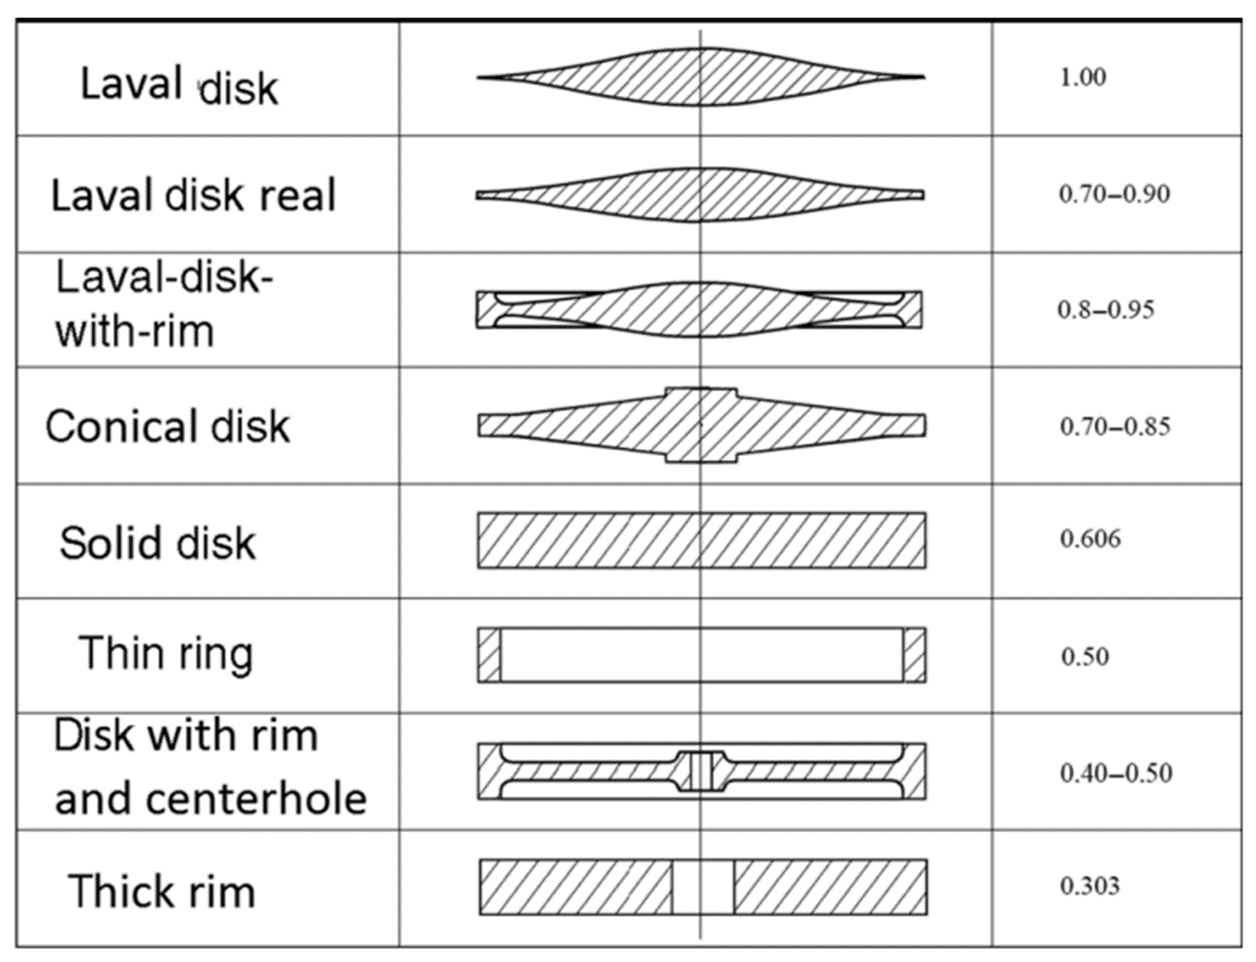

In [ ]:
Image("/content/gdrive/MyDrive/Colab Notebooks/Anish/Flywheel_shape_index.png")

In [ ]:
flywheel_radius = float(input("Please enter the design radius of the flywheel : "))
shape_factor = float(input("Enter the shape factor index selected : "))
max_stress = float(input("Maximum Stress from FEA Analysis : "))
max_speed = float(input("Max_RPM : "))

Please enter the design radius of the flywheel : 0.635
Enter the shape factor index selected : 0.303
Maximum Stress from FEA Analysis : 268
Max_RPM : 2000


In [ ]:
df['Maximum_Rotational_Speed']=np.sqrt(2200*shape_factor*(df['Ultimate_lower']+df['Ultimate_upper'])/(df['Density_lower']+df['Density_upper'])/flywheel_radius)*30/math.pi
df['Shape_Factor_index']=shape_factor

In [ ]:
df["Maximum_Rotational_Speed"].describe()

count     1000.000000
mean      3029.205948
std       1382.495247
min        105.281415
25%       2288.233700
50%       2992.497688
75%       3714.727371
max      12186.038836
Name: Maximum_Rotational_Speed, dtype: float64

In [ ]:
figure=px.scatter(x=np.log10((df['Density_upper']+df['Density_lower'])/2),y=np.log10((df['Ultimate_upper']+df['Ultimate_lower'])/2),color=df['Material'],hover_name=df['Alloys'],hover_data={'Density':df['Density (Mg/m3)'],'Strength':df['Ultimate Tensile Stress (MPa)']})
figure.update_layout(xaxis_range=[-2,2],yaxis_range=[-2,4],xaxis_title='log Density',yaxis_title='log Strength',title='Material Selection for Flywheels')
figure.show()

## **Add ons**

In [ ]:
#size=df[['Density_lower', 'Density_upper', 'Ultimate_lower', 'Ultimate_upper']].mean(axis=1)
#figure.add_shape(type='circle',fillcolor=color,x0=math.log10(df1['Density_lower'].min())*0.98,y0=math.log10(df1['Ultimate_lower'].min())*0.98,x1=math.log10(df1['Density_upper'].max())*1.02,y1=math.log10(df1['Ultimate_upper'].max())*1.02,line_color=color,opacity=0.1)
#figure.add_shape(type='circle',fillcolor=color,x0=math.log10(df1['Density_lower'].min())*0.98,y0=math.log10(df1['Ultimate_lower'].min())*0.98,x1=math.log10(df1['Density_upper'].max())*1.02,y1=math.log10(df1['Ultimate_upper'].max())*1.02,line_color=color,opacity=0.1,label_text=i,label_textposition='bottom center')
#xaxis_range=[math.log10(df1['Density_lower'].min()),math.log10(df1['Density_upper'].max())],yaxis_range=[math.log10(df1['Ultimate_lower'].min()),math.log10(df1['Ultimate_upper'].max())],

In [ ]:
figure=px.scatter(x=np.log10((df['Density_upper']+df['Density_lower'])/2),y=np.log10((df['Ultimate_upper']+df['Ultimate_lower'])/2),color=df['Material'],hover_name=df['Alloys'],hover_data={'Density':df['Density (Mg/m3)'],'Strength':df['Ultimate Tensile Stress (MPa)']})
figure.update_layout(xaxis_range=[-2,2],yaxis_range=[-2,4],xaxis_title='log Density',yaxis_title='log Strength')
colors=px.colors.qualitative.Plotly
for i in df['Material'].unique():
  df1=df[df['Material']==i]
  df1=df1[['Density_lower', 'Density_upper', 'Ultimate_lower', 'Ultimate_upper']]
  color=np.random.choice(colors)
  figure.add_shape(type='circle',fillcolor=color,x0=math.log10(df1['Density_lower'].min())*0.98,y0=math.log10(df1['Ultimate_lower'].min())*0.98,x1=math.log10(df1['Density_upper'].max())*1.02,y1=math.log10(df1['Ultimate_upper'].max())*1.02,line_color=color,opacity=0.1)
figure.write_html("/content/gdrive/MyDrive/Colab Notebooks/Anish/Ashby_graph.html")

In [ ]:
Material_Index=0
#_________________________________________________________________________________________________________________________________
figure=px.scatter(x=np.log10((df['Density_upper']+df['Density_lower'])/2),y=np.log10((df['Ultimate_upper']+df['Ultimate_lower'])/2),color=df['Material'],hover_name=df['Alloys'],hover_data={'Density':df['Density (Mg/m3)'],'Strength':df['Ultimate Tensile Stress (MPa)'],'Maximum Speed':round(df['Maximum_Rotational_Speed'],2)})
figure.update_layout(xaxis_range=[-2,2],yaxis_range=[-2.5,4],xaxis_title='log Density',yaxis_title='log Strength',title='Material Selection for Flywheels')
colors=px.colors.qualitative.Plotly
for i in df['Material'].unique():
  df1=df[df['Material']==i]
  df1=df1[['Density_lower', 'Density_upper', 'Ultimate_lower', 'Ultimate_upper']]
  color=np.random.choice(colors)
  figure.add_shape(type='circle',fillcolor=color,x0=math.log10(df1['Density_lower'].min())*0.98,y0=math.log10(df1['Ultimate_lower'].min())*0.98,x1=math.log10(df1['Density_upper'].max())*1.02,y1=math.log10(df1['Ultimate_upper'].max())*1.02,line_color=color,opacity=0.1,label_text=i,label_textposition='bottom center')
#-----------------------------------------------------------------------------------
x=np.arange(-3,5,0.1)
y=x+Material_Index
#figure.add_scatter(x=x,y=y,mode='lines',line_color='red',name='Selection Line')
figure.show()

# **Selection based on Material Index**

In [ ]:
Material_Index=-2
df1=df.copy()
#_________________________________________________________________________________________________________________________________
df1['Material_Index']=np.round(((df['Ultimate_upper']+df['Ultimate_lower'])/2)/((df['Density_upper']+df['Density_lower'])/2),2)
df1=df1[df1['Material_Index']>=Material_Index]
figure=px.scatter(x=np.log10((df1['Density_upper']+df1['Density_lower'])/2),y=np.log10((df1['Ultimate_upper']+df1['Ultimate_lower'])/2),color=df1['Material'],hover_name=df1['Alloys'],hover_data={'Density':df1['Density (Mg/m3)'],'Strength':df1['Ultimate Tensile Stress (MPa)'],'Material_Index':df1['Material_Index'],'Maximum Speed':round(df['Maximum_Rotational_Speed'],2)})
figure.update_layout(xaxis_range=[-2.3,2],yaxis_range=[-2.5,4],xaxis_title='log Density',yaxis_title='log Strength',title='Material Selection for Flywheels')
colors=px.colors.qualitative.Plotly
for i in df1['Material'].unique():
  df2=df1[df1['Material']==i]
  df2=df2[['Density_lower', 'Density_upper', 'Ultimate_lower', 'Ultimate_upper']]
  color=np.random.choice(colors)
  figure.add_shape(type='circle',fillcolor=color,x0=math.log10(df2['Density_lower'].min())*0.98,y0=math.log10(df2['Ultimate_lower'].min())*0.98,x1=math.log10(df2['Density_upper'].max())*1.02,y1=math.log10(df2['Ultimate_upper'].max())*1.02,line_color=color,opacity=0.1,label_text=i,label_textposition='bottom center')
#-----------------------------------------------------------------------------------
x=np.arange(-3,5,0.1)
y=x+Material_Index
figure.add_scatter(x=x,y=y,mode='lines',line_color='red',name='Selection Line')
figure.show()

In [ ]:
df=df1.copy()

# **Ashby's Chart**

In [ ]:
app=Dash(__name__)

app.layout = html.Div([
    html.H4("Material Selection for Flywheels"),
    dcc.Graph(id="scatter-plot"),
    html.P("Material Index: "),
    dcc.RangeSlider(
        id='range-slider',
        min=0,max=1600,step=1,
        marks={0:'0',20:'20',50:'50',100:'100',200:'200',300:'300',400:'400',1600:'1600'},
        value=[0,1600],
        tooltip={
            "placement":"bottom",
            "always_visible":True,
            "style":{"color":"White","fontSize":"20px"}
                  }
    ),
])

@app.callback(
    Output("scatter-plot","figure"),
    Input("range-slider","value"))
def scatter_plot(slider_range):
  df1=df.copy()
  low,high = slider_range
  df1['Material_Index']=np.round(((df['Ultimate_upper']+df['Ultimate_lower'])/2)/((df['Density_upper']+df['Density_lower'])/2),2)
  df1=df1[(df1['Material_Index']>low)&(df1['Material_Index']<high)]
  figure=px.scatter(x=(df1['Density_upper']+df1['Density_lower'])/2,y=(df1['Ultimate_upper']+df1['Ultimate_lower'])/2,color=df1['Material'],hover_name=df1['Alloys'],hover_data={'Density':df1['Density (Mg/m3)'],'Strength':df1['Ultimate Tensile Stress (MPa)'],'Material_Index':df1['Material_Index'],'Maximum Speed':round(df['Maximum_Rotational_Speed'],2)},log_x=True,log_y=True)
  figure.update_layout(xaxis_range=[-2.3,2],yaxis_range=[-2.5,4],xaxis_title='Density (g/m^3)',yaxis_title='Strength (Mpa)',title='Material Selection for Flywheels')
  colors=px.colors.qualitative.Plotly
  for i in df1['Material'].unique():
    df2=df1[df1['Material']==i]
    df2=df2[['Density_lower', 'Density_upper', 'Ultimate_lower', 'Ultimate_upper']]
    color=np.random.choice(colors)
    figure.add_shape(type='circle',fillcolor=color,x0=df2['Density_lower'].min()*0.98,y0=df2['Ultimate_lower'].min()*0.98,x1=df2['Density_upper'].max()*1.02,y1=df2['Ultimate_upper'].max()*1.02,line_color=color,opacity=0.1,label_text=i,label_textposition='bottom center')
  return figure

app.run_server(debug=True)

<IPython.core.display.Javascript object>

# **Ashby's Chart - Fatigue Strength**

In [ ]:
app=Dash(__name__)

app.layout = html.Div([
    html.H4("Material Selection for Flywheels"),
    dcc.Graph(id="scatter-plot"),
    html.P("Material Index: "),
    dcc.RangeSlider(
        id='range-slider',
        min=0,max=1600,step=1,
        marks={0:'0',20:'20',50:'50',100:'100',200:'200',300:'300',400:'400',1600:'1600'},
        value=[0,1600],
        tooltip={
            "placement":"bottom",
            "always_visible":True,
            "style":{"color":"White","fontSize":"20px"}
                  }
    ),
])

@app.callback(
    Output("scatter-plot","figure"),
    Input("range-slider","value"))
def scatter_plot(slider_range):
  df1=df.copy()
  low,high = slider_range
  df1['Material_Index']=np.round(((df['Fatigue_upper']+df['Fatigue_lower'])/2)/((df['Density_upper']+df['Density_lower'])/2),2)
  df1=df1[(df1['Material_Index']>low)&(df1['Material_Index']<high)]
  figure=px.scatter(x=(df1['Density_upper']+df1['Density_lower'])/2,y=(df1['Fatigue_upper']+df1['Fatigue_lower'])/2,color=df1['Material'],hover_name=df1['Alloys'],hover_data={'Density':df1['Density (Mg/m3)'],'Fatigue Strength':df1['Fatigue strength at 10^7 cycle(Mpa)'],'Material_Index':df1['Material_Index'],'Maximum Speed':round(df['Maximum_Rotational_Speed'],2)},log_x=True,log_y=True)
  figure.update_layout(xaxis_range=[-2.3,2],yaxis_range=[-2.5,4],xaxis_title='Density (g/m^3)',yaxis_title='Fatigue Strength (Mpa)',title='Material Selection for Flywheels - Fatigue Strength')
  colors=px.colors.qualitative.Plotly
  for i in df1['Material'].unique():
    df2=df1[df1['Material']==i]
    df2=df2[['Density_lower', 'Density_upper', 'Fatigue_lower', 'Fatigue_upper']]
    color=np.random.choice(colors)
    figure.add_shape(type='circle',fillcolor=color,x0=df2['Density_lower'].min()*0.98,y0=df2['Fatigue_lower'].min()*0.98,x1=df2['Density_upper'].max()*1.02,y1=df2['Fatigue_upper'].max()*1.02,line_color=color,opacity=0.1,label_text=i,label_textposition='bottom center')
  return figure

app.run_server(debug=True)

<IPython.core.display.Javascript object>

# **Ashby's Chart - Filtered Data**

In [ ]:
df=df[(df['Yield_lower']+df['Yield_upper'])/2>=max_stress]
df=df[df['Maximum_Rotational_Speed']>=max_speed]

In [ ]:
app=Dash(__name__)

app.layout = html.Div([
    html.H4("Material Selection for Flywheels"),
    dcc.Graph(id="scatter-plot"),
    html.P("Material Index: "),
    dcc.RangeSlider(
        id='range-slider',
        min=0,max=1600,step=1,
        marks={0:'0',20:'20',50:'50',100:'100',200:'200',300:'300',400:'400',1600:'1600'},
        value=[0,1600],
        tooltip={
            "placement":"bottom",
            "always_visible":True,
            "style":{"color":"White","fontSize":"20px"}
                  }
    ),
])

@app.callback(
    Output("scatter-plot","figure"),
    Input("range-slider","value"))
def scatter_plot(slider_range):
  df1=df.copy()
  low,high = slider_range
  df1['Material_Index']=np.round(((df['Ultimate_upper']+df['Ultimate_lower'])/2)/((df['Density_upper']+df['Density_lower'])/2),2)
  df1=df1[(df1['Material_Index']>low)&(df1['Material_Index']<high)]
  figure=px.scatter(x=(df1['Density_upper']+df1['Density_lower'])/2,y=(df1['Ultimate_upper']+df1['Ultimate_lower'])/2,color=df1['Material'],hover_name=df1['Alloys'],hover_data={'Density':df1['Density (Mg/m3)'],'Strength':df1['Ultimate Tensile Stress (MPa)'],'Material_Index':df1['Material_Index'],'Maximum Speed':round(df['Maximum_Rotational_Speed'],2)},log_x=True,log_y=True)
  figure.update_layout(xaxis_range=[-2.3,2],yaxis_range=[-2.5,4],xaxis_title='Density (g/m^3)',yaxis_title='Strength (Mpa)',title='Material Selection for Flywheels')
  colors=px.colors.qualitative.Plotly
  for i in df1['Material'].unique():
    df2=df1[df1['Material']==i]
    df2=df2[['Density_lower', 'Density_upper', 'Ultimate_lower', 'Ultimate_upper']]
    color=np.random.choice(colors)
    figure.add_shape(type='circle',fillcolor=color,x0=df2['Density_lower'].min()*0.98,y0=df2['Ultimate_lower'].min()*0.98,x1=df2['Density_upper'].max()*1.02,y1=df2['Ultimate_upper'].max()*1.02,line_color=color,opacity=0.1,label_text=i,label_textposition='bottom center')
  return figure

app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
px.histogram(data_frame=df1,x='Material_Index',nbins=300).show()

In [ ]:
scatter_plot((0,1600))

# **Multi Criteria Decision Making**

# **Selecting the materials with Material Index above a threshold**

In [ ]:
df.columns

Index(['Class ', 'Sub-class', 'Material', 'Alloys', 'Density (Mg/m3)',
       'Youngs Modulus(GPa)', 'Yield Stress (MPa)',
       'Ultimate Tensile Stress (MPa)', 'Poisson's ratio', 'cost(/Kg/m3)',
       'CO2 - equivalent (Kg/Kg)', 'Shear modulus(Gpa)',
       'Fatigue strength at 10^7 cycle(Mpa)', 'Vickers-hardness',
       'Density_lower', 'Density_upper', 'Ultimate_lower', 'Ultimate_upper',
       'Yield_lower', 'Yield_upper', 'Fatigue_lower', 'Fatigue_upper',
       'Maximum_Rotational_Speed', 'Shape_Factor_index', 'Material_Index'],
      dtype='object')

In [ ]:
df1=df.copy()
df1.loc[::,'Fatigue_Strength']=(df1['Fatigue_lower']+df1['Fatigue_upper'])/2
lower_limit=200
upper_limit=1000  # Give 1000  for this value to include all the materials
final_choice=df1[(df1['Material_Index']>lower_limit)&(df1['Material_Index']<upper_limit)].reset_index(drop=True)
final_choice['CO2 - equivalent (Kg/Kg)']=final_choice['CO2 - equivalent (Kg/Kg)'].apply(avg)
final_choice['Vickers-hardness']=1000/(final_choice['Vickers-hardness'].apply(avg))
final_choice

,Class,Sub-class,Material,Alloys,Density (Mg/m3),Youngs Modulus(GPa),Yield Stress (MPa),Ultimate Tensile Stress (MPa),Poisson's ratio,cost(/Kg/m3),...,Ultimate_lower,Ultimate_upper,Yield_lower,Yield_upper,Fatigue_lower,Fatigue_upper,Maximum_Rotational_Speed,Shape_Factor_index,Material_Index,Fatigue_Strength
0,Metal,Ferrous,High alloy steel,"AerMet 100, High alloy steel (ST & A)",7.93,203,1790,2130,0.312,3780.0,...,2129.95,2130.05,1789.95,1790.05,772.0,900.0,5070.728782,0.303,268.60,836.0
1,Metal,Ferrous,High alloy steel,"AF1410, High alloy steel (ST & O)",7.87,213,1640,1790,0.312,2960.0,...,1789.95,1790.05,1639.95,1640.05,650.0,750.0,4666.124511,0.303,227.45,700.0
2,Metal,Ferrous,High alloy steel,"250, High alloy steel (marged at 482 degree)",7.96,192,1810,1870,0.323,3880.0,...,1869.95,1870.05,1809.95,1810.05,642.0,816.0,4742.217223,0.303,234.92,729.0
3,Metal,Ferrous,High alloy steel,"300, High alloy steel (marged at 482 degree)",7.96,192,1810,2017,0.323,4000.0,...,2016.95,2017.05,1809.95,1810.05,816.0,897.0,4925.083402,0.303,253.39,856.5
4,Metal,Ferrous,Low alloy steel,"AISI 4042, Low alloy steel (Q & T) at 205 degr...",7.8 - 7.9,201 - 212,1500 - 1820,1620 - 1980,0.285 - 0.295,156.0,...,1620.00,1980.00,1500.00,1820.00,599.0,691.0,4685.097122,0.303,229.30,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Hybrids,Composites,Polymer matrix,"PEEK/IM carbon fiber, UD prepreg, QI lay-up, p...",1.55 - 1.57,56.1 - 57.1,460 - 473,460 - 473,0.31 - 0.33,9830.0,...,460.00,473.00,460.00,473.00,253.0,307.0,5350.331595,0.303,299.04,280.0
132,Hybrids,Composites,Polymer matrix,"PA12/E-glass fiber, woven fabric laminate, bia...",1.7 - 1.8,19.1 - 20,360 - 400,360 - 400,0.1 - 0.11,755.0,...,360.00,400.00,360.00,400.00,216.0,240.0,4559.213690,0.303,217.14,228.0
133,Hybrids,Composites,Polymer matrix,"PA6/E-glass fiber, woven fabric laminate, biax...",1.8 - 1.9,28.6 - 31.6,575 - 635,575 - 635,0.125 - 0.15,577.0,...,575.00,635.00,575.00,635.00,345.0,381.0,5595.114741,0.303,327.03,363.0
134,Hybrids,Composites,Polymer matrix,"Polyimide/HS carbon fiber, woven prepreg, biax...",1.59 - 1.63,58.1 - 62.3,738 - 910,738 - 910,0.05 - 0.06,13100.0,...,738.00,910.00,738.00,910.00,406.0,592.0,6999.513280,0.303,511.80,499.0


In [ ]:
final_choice=final_choice[['Alloys', 'Material_Index','cost(/Kg/m3)','CO2 - equivalent (Kg/Kg)','Fatigue_Strength']].set_index("Alloys")
final_choice

,Material_Index,cost(/Kg/m3),CO2 - equivalent (Kg/Kg),Fatigue_Strength
Alloys,,,,
"AerMet 100, High alloy steel (ST & A)",268.60,3780.0,9.705,836.0
"AF1410, High alloy steel (ST & O)",227.45,2960.0,9.720,700.0
"250, High alloy steel (marged at 482 degree)",234.92,3880.0,8.680,729.0
"300, High alloy steel (marged at 482 degree)",253.39,4000.0,9.345,856.5
"AISI 4042, Low alloy steel (Q & T) at 205 degree - Mag",229.30,156.0,2.335,645.0
...,...,...,...,...
"PEEK/IM carbon fiber, UD prepreg, QI lay-up, polymer matrix",299.04,9830.0,54.450,280.0
"PA12/E-glass fiber, woven fabric laminate, biaxial lay-up, polymer matrix",217.14,755.0,6.980,228.0
"PA6/E-glass fiber, woven fabric laminate, biaxial lay-up, polymer matrix",327.03,577.0,7.075,363.0


In [ ]:
matrix=final_choice.copy()
#matrix=matrix.drop(index='Diamond')
matrix['Material_Index']=matrix['Material_Index']/(matrix['Material_Index'].sum())
matrix['cost(/Kg/m3)']=matrix['cost(/Kg/m3)']/(matrix['cost(/Kg/m3)'].sum())
matrix['CO2 - equivalent (Kg/Kg)']=matrix['CO2 - equivalent (Kg/Kg)']/(matrix['CO2 - equivalent (Kg/Kg)'].sum())
matrix['Fatigue_Strength']=matrix['Fatigue_Strength']/matrix['Fatigue_Strength'].sum()

In [ ]:
matrix

,Material_Index,cost(/Kg/m3),CO2 - equivalent (Kg/Kg),Fatigue_Strength
Alloys,,,,
"AerMet 100, High alloy steel (ST & A)",0.007015,0.000069,0.001056,0.010078
"AF1410, High alloy steel (ST & O)",0.005940,0.000054,0.001057,0.008439
"250, High alloy steel (marged at 482 degree)",0.006135,0.000070,0.000944,0.008789
"300, High alloy steel (marged at 482 degree)",0.006618,0.000073,0.001017,0.010326
"AISI 4042, Low alloy steel (Q & T) at 205 degree - Mag",0.005988,0.000003,0.000254,0.007776
...,...,...,...,...
"PEEK/IM carbon fiber, UD prepreg, QI lay-up, polymer matrix",0.007810,0.000179,0.005923,0.003376
"PA12/E-glass fiber, woven fabric laminate, biaxial lay-up, polymer matrix",0.005671,0.000014,0.000759,0.002749
"PA6/E-glass fiber, woven fabric laminate, biaxial lay-up, polymer matrix",0.008541,0.000010,0.000770,0.004376


In [ ]:
entropy_material_index=-(1/math.log(matrix.shape[0]))*(matrix['Material_Index']*np.log(matrix['Material_Index'])).sum()
entropy_cost=-(1/math.log(matrix.shape[0]))*(matrix['cost(/Kg/m3)']*np.log(matrix['cost(/Kg/m3)'])).sum()
entropy_carbon_equivalence=-(1/math.log(matrix.shape[0]))*(matrix['CO2 - equivalent (Kg/Kg)']*np.log(matrix['CO2 - equivalent (Kg/Kg)'])).sum()
entropy_fatigue_strength=-(1/math.log(matrix.shape[0]))*(matrix['Fatigue_Strength']*np.log(matrix['Fatigue_Strength'])).sum()

In [ ]:
entropy_material_index,entropy_cost,entropy_carbon_equivalence,entropy_fatigue_strength

(0.9867516819853276,
 0.10063680653472891,
 0.7143839721810955,
 0.959300776100066)

In [ ]:
weight_material_index=(1-entropy_material_index)/(4-(entropy_material_index+entropy_cost+entropy_carbon_equivalence+entropy_fatigue_strength))
weight_cost=(1-entropy_cost)/(4-(entropy_material_index+entropy_cost+entropy_carbon_equivalence+entropy_fatigue_strength))
weight_carbon_equivalence=(1-entropy_carbon_equivalence)/(4-(entropy_material_index+entropy_cost+entropy_carbon_equivalence+entropy_fatigue_strength))
weight_fatigue_strength=(1-entropy_fatigue_strength)/(4-(entropy_material_index+entropy_cost+entropy_carbon_equivalence+entropy_fatigue_strength))
weight_material_index,weight_cost,weight_carbon_equivalence,weight_fatigue_strength

(0.010693382698801835,
 0.7259211925838196,
 0.2305350375041324,
 0.03285038721324637)

## Case 1

In [ ]:
subjective_weight_material_index=0.6
subjective_weight_cost=0.01
subjective_weight_carbon_equivalence=0.09
subjective_weight_fatigue_strength=0.3
subjective_weight_material_index,subjective_weight_cost,subjective_weight_carbon_equivalence,subjective_weight_fatigue_strength

(0.6, 0.01, 0.09, 0.3)

In [ ]:
adjusted_weight_material_index=subjective_weight_material_index*weight_material_index/(subjective_weight_material_index*weight_material_index+subjective_weight_cost*weight_cost+subjective_weight_carbon_equivalence*weight_carbon_equivalence+subjective_weight_fatigue_strength*weight_fatigue_strength)
adjusted_weight_cost=subjective_weight_cost*weight_cost/(subjective_weight_material_index*weight_material_index+subjective_weight_cost*weight_cost+subjective_weight_carbon_equivalence*weight_carbon_equivalence+subjective_weight_fatigue_strength*weight_fatigue_strength)
adjusted_weight_carbon_equivalence=subjective_weight_carbon_equivalence*weight_carbon_equivalence/(subjective_weight_material_index*weight_material_index+subjective_weight_cost*weight_cost+subjective_weight_carbon_equivalence*weight_carbon_equivalence+subjective_weight_fatigue_strength*weight_fatigue_strength)
adjusted_weight_fatigue_strength=subjective_weight_fatigue_strength*weight_fatigue_strength/(subjective_weight_material_index*weight_material_index+subjective_weight_cost*weight_cost+subjective_weight_carbon_equivalence*weight_carbon_equivalence+subjective_weight_fatigue_strength*weight_fatigue_strength)

In [ ]:
adjusted_weight_material_index,adjusted_weight_cost,adjusted_weight_carbon_equivalence,adjusted_weight_fatigue_strength

(0.1449016568565724,
 0.16394435467783947,
 0.4685829055045009,
 0.2225710829610873)

# **Experiment 1**

In [ ]:
S=matrix.copy(deep=True)
S['Material_Index']=matrix['Material_Index']*adjusted_weight_material_index
S['cost(/Kg/m3)']=matrix['cost(/Kg/m3)']*adjusted_weight_cost
S['CO2 - equivalent (Kg/Kg)']=matrix['CO2 - equivalent (Kg/Kg)']*adjusted_weight_carbon_equivalence
S['Fatigue_Strength']=matrix['Fatigue_Strength']*adjusted_weight_fatigue_strength

In [ ]:
# s_plus=(np.square(v1-v_plus).sum())**0.5
# s_minus=(np.square(v1-v_minus).sum())**0.5
# s_plus,s_minus

In [ ]:
S_plus=S.copy(deep=True)
S_plus['Material_Index']=np.square(S['Material_Index']-S['Material_Index'].max())
S_plus['cost(/Kg/m3)']=np.square(S['cost(/Kg/m3)']-S['cost(/Kg/m3)'].min())
S_plus['CO2 - equivalent (Kg/Kg)']=np.square(S['CO2 - equivalent (Kg/Kg)']-S['CO2 - equivalent (Kg/Kg)'].min())
S_plus['Fatigue_Strength']=np.square(S['Fatigue_Strength']-S['Fatigue_Strength'].min())
S_plus['Separation']=S_plus.sum(axis=1)**0.5
S_plus

,Material_Index,cost(/Kg/m3),CO2 - equivalent (Kg/Kg),Fatigue_Strength,Separation
Alloys,,,,,
"AerMet 100, High alloy steel (ST & A)",0.000006,1.265324e-10,1.411328e-07,4.878915e-06,0.003298
"AF1410, High alloy steel (ST & O)",0.000007,7.756135e-11,1.417078e-07,3.399999e-06,0.003190
"250, High alloy steel (marged at 482 degree)",0.000006,1.333202e-10,1.046059e-07,3.693016e-06,0.003208
"300, High alloy steel (marged at 482 degree)",0.000006,1.416997e-10,1.276818e-07,5.124938e-06,0.003375
"AISI 4042, Low alloy steel (Q & T) at 205 degree - Mag",0.000007,2.090648e-13,0.000000e+00,2.877541e-06,0.003078
...,...,...,...,...,...
"PEEK/IM carbon fiber, UD prepreg, QI lay-up, polymer matrix",0.000005,8.563902e-10,7.056971e-06,5.140264e-07,0.003590
"PA12/E-glass fiber, woven fabric laminate, biaxial lay-up, polymer matrix",0.000007,5.021713e-12,5.606144e-08,3.334242e-07,0.002688
"PA6/E-glass fiber, woven fabric laminate, biaxial lay-up, polymer matrix",0.000005,2.927095e-12,5.837804e-08,8.829677e-07,0.002404


In [ ]:
S_minus=S.copy(deep=True)
S_minus['Material_Index']=np.square(S['Material_Index']-S['Material_Index'].min())
S_minus['cost(/Kg/m3)']=np.square(S['cost(/Kg/m3)']-S['cost(/Kg/m3)'].max())
S_minus['CO2 - equivalent (Kg/Kg)']=np.square(S['CO2 - equivalent (Kg/Kg)']-S['CO2 - equivalent (Kg/Kg)'].max())
S_minus['Fatigue_Strength']=np.square(S['Fatigue_Strength']-S['Fatigue_Strength'].min())
S_minus['Separation']=S_minus.sum(axis=1)**0.5
S_minus

,Material_Index,cost(/Kg/m3),CO2 - equivalent (Kg/Kg),Fatigue_Strength,Separation
Alloys,,,,,
"AerMet 100, High alloy steel (ST & A)",6.561676e-08,0.023241,0.001892,4.878915e-06,0.158549
"AF1410, High alloy steel (ST & O)",1.008713e-08,0.023242,0.001892,3.399999e-06,0.158547
"250, High alloy steel (marged at 482 degree)",1.656453e-08,0.023241,0.001896,3.693016e-06,0.158560
"300, High alloy steel (marged at 482 degree)",3.944150e-08,0.023241,0.001893,5.124938e-06,0.158555
"AISI 4042, Low alloy steel (Q & T) at 205 degree - Mag",1.154241e-08,0.023244,0.001925,2.877541e-06,0.158657
...,...,...,...,...,...
"PEEK/IM carbon fiber, UD prepreg, QI lay-up, polymer matrix",1.379016e-07,0.023236,0.001699,5.140264e-07,0.157908
"PA12/E-glass fiber, woven fabric laminate, biaxial lay-up, polymer matrix",3.772270e-09,0.023244,0.001904,3.334242e-07,0.158582
"PA6/E-glass fiber, woven fabric laminate, biaxial lay-up, polymer matrix",2.277895e-07,0.023244,0.001904,8.829677e-07,0.158583


In [ ]:
def close(s1,s2):
  ind=s1.index
  s1=s1.to_list()
  s2=s2.to_list()
  s=[]
  for i in range(len(s1)):
    s.append(s1[i]/(s1[i]+s2[i]))
  s=pd.Series(data=s,index=ind)
  return s
closeness=close(S_minus['Separation'],S_plus['Separation'])
closeness=pd.DataFrame(closeness,columns=['MCDM'])

In [ ]:
chosen_materials=closeness.sort_values(by='MCDM',ascending=False)
chosen_materials

,MCDM
Alloys,
"Epoxy/S-glass fiber, UD prepred, UD lay-up, polymer matrix",0.992799
"Mg-70%B(f), londitudinal, magnesium matrix",0.988184
"Epoxy/armid fiber,, UD prepreg, UD lay-up, polymer matrix",0.987259
"Epoxy/E-glass fiber, UD prepred, UD lay-up, polymer matrix",0.987021
"Al-60%C-M40(HM-C-fiber), longitudinal",0.985786
...,...
"grade S-200, Berylliym, extruded",0.776069
"grade S-200FH. Beryllium, hot isostatically pressed",0.776037
"grade I-220B, Beryllium, vaccum hot-pressed",0.776022


In [ ]:
chosen_materials.head(10)

,MCDM
Alloys,
"Epoxy/S-glass fiber, UD prepred, UD lay-up, polymer matrix",0.992799
"Mg-70%B(f), londitudinal, magnesium matrix",0.988184
"Epoxy/armid fiber,, UD prepreg, UD lay-up, polymer matrix",0.987259
"Epoxy/E-glass fiber, UD prepred, UD lay-up, polymer matrix",0.987021
"Al-60%C-M40(HM-C-fiber), longitudinal",0.985786
"Mg(+4%Al)-30%graphite (f), londitudinal, magnesium matrix",0.985203
"Mg(+2%Al)-30%graphite (f), londitudinal, magnesium matrix",0.985197
"PA6/E-glass fiber, woven fabric laminate, biaxial lay-up, polymer matrix",0.985070
"Epoxy/armid fiber, UD prepreg, QI lay-up, polymer matrix",0.984593


In [ ]:
9

9

# **Material Selection for Multi-Rim Flywheel**

In [ ]:
# n=int(input('Please enter the desired number of rims for the flywheel: '))

In [ ]:
# mr_df=pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Anish/multi_rim.xlsx')

In [ ]:
#


In [ ]:
# materials=[]
# for k in range(n):
#   print(f'Select the material number {k+1}')
#   print("------------------------------------------------------------")
#   d={}
#   j=1
#   for i in mr_df['Material'].to_list():
#     d.update({j:i})
#     j+=1
#   for i,j in d.items():
#     print(j,':',i)
#   select=int(input('Please select one of the above materials for Multi-rim Flywheel : '))
#   materials.append(d[select])
#   print("____________________________________________________________")
#   print()

In [ ]:
# for i in materials:
#   ir=mr_df[mr_df['Material']==i].index[0]
#   q=[]
#   for j in range(4):
#     if j==0:
#         q.append([mr_df.loc[ir,"Longitudinal young's modulus (GPa)"],-(mr_df.loc[ir,"Transverse youngs's modulus (Gpa)"]/mr_df.loc[ir,"Long-trans poisson's ratio"]),-(mr_df.loc[ir,"Transverse youngs's modulus (Gpa)"]/mr_df.loc[ir,"Long-trans poisson's ratio"]),0])